In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy
import heatwaves as htwv
import matplotlib.animation as animation

# Grab data

Cut out North Atlantic from ERA5 data

In [2]:
# 10 m u component of wind
'''u = xr.open_mfdataset("/srv/cmip6/data/era5/reanalysis/single-levels/monthly-means/10m_u_component_of_wind/????_10m_u_component_of_wind.nc")
u = u.rename({"latitude":"lat", "longitude":"lon"})
u.coords['lon'] = (u.coords['lon'] + 180) % 360 - 180
u = u.sortby("lon")
u = u.sortby("lat")
north_atlantic_u = u[["u10"]].sel(lat=slice(-10,80), lon=slice(-120,60)).load()
north_atlantic_u.to_netcdf(path="sst_data/10m_u.monthly.mean.1979-2022.na.nc")'''

'u = xr.open_mfdataset("/srv/cmip6/data/era5/reanalysis/single-levels/monthly-means/10m_u_component_of_wind/????_10m_u_component_of_wind.nc")\nu = u.rename({"latitude":"lat", "longitude":"lon"})\nu.coords[\'lon\'] = (u.coords[\'lon\'] + 180) % 360 - 180\nu = u.sortby("lon")\nu = u.sortby("lat")\nnorth_atlantic_u = u[["u10"]].sel(lat=slice(-10,80), lon=slice(-120,60)).load()\nnorth_atlantic_u.to_netcdf(path="sst_data/10m_u.monthly.mean.1979-2022.na.nc")'

In [3]:
# 10 m v component of wind
'''v = xr.open_mfdataset("/srv/cmip6/data/era5/reanalysis/single-levels/monthly-means/10m_v_component_of_wind/????_10m_v_component_of_wind.nc")
v = v.rename({"latitude":"lat", "longitude":"lon"})
v.coords['lon'] = (u.coords['lon'] + 180) % 360 - 180
v = v.sortby("lon")
v = v.sortby("lat")
north_atlantic_v = v[["v10"]].sel(lat=slice(-10,80), lon=slice(-120,60)).load()
north_atlantic_v.to_netcdf(path="sst_data/10m_v.monthly.mean.1979-2022.na.nc")'''

'v = xr.open_mfdataset("/srv/cmip6/data/era5/reanalysis/single-levels/monthly-means/10m_v_component_of_wind/????_10m_v_component_of_wind.nc")\nv = v.rename({"latitude":"lat", "longitude":"lon"})\nv.coords[\'lon\'] = (u.coords[\'lon\'] + 180) % 360 - 180\nv = v.sortby("lon")\nv = v.sortby("lat")\nnorth_atlantic_v = v[["v10"]].sel(lat=slice(-10,80), lon=slice(-120,60)).load()\nnorth_atlantic_v.to_netcdf(path="sst_data/10m_v.monthly.mean.1979-2022.na.nc")'

In [4]:
# Sea level pressure
'''mslp = xr.open_mfdataset("/srv/cmip6/data/era5/reanalysis/single-levels/monthly-means/mean_sea_level_pressure/????_mean_sea_level_pressure.nc")
mslp = mslp.rename({"latitude":"lat", "longitude":"lon"})
mslp.coords['lon'] = (mslp.coords['lon'] + 180) % 360 - 180
mslp = mslp.sortby("lon")
mslp = mslp.sortby("lat")
north_atlantic_mslp = mslp[["msl"]].sel(lat=slice(-10,80), lon=slice(-120,60)).load()
north_atlantic_mslp.to_netcdf(path="sst_data/mslp.monthly.mean.1979-2022.na.nc")'''

'mslp = xr.open_mfdataset("/srv/cmip6/data/era5/reanalysis/single-levels/monthly-means/mean_sea_level_pressure/????_mean_sea_level_pressure.nc")\nmslp = mslp.rename({"latitude":"lat", "longitude":"lon"})\nmslp.coords[\'lon\'] = (mslp.coords[\'lon\'] + 180) % 360 - 180\nmslp = mslp.sortby("lon")\nmslp = mslp.sortby("lat")\nnorth_atlantic_mslp = mslp[["msl"]].sel(lat=slice(-10,80), lon=slice(-120,60)).load()\nnorth_atlantic_mslp.to_netcdf(path="sst_data/mslp.monthly.mean.1979-2022.na.nc")'

Load data

In [5]:
# need to LOAD data to plot - otherwise you'll get errors
ssts = xr.load_dataset("sst_data/sst.day.mean.1982-2024.na.nc")
mslp = xr.load_dataset("sst_data/mslp.monthly.mean.1979-2022.na.nc")/100
u_wind = xr.load_dataset("sst_data/10m_u.monthly.mean.1979-2022.na.nc")
v_wind = xr.load_dataset("sst_data/10m_v.monthly.mean.1979-2022.na.nc")
# Put u and v components of wind into one DataSet
wind = xr.merge([u_wind, v_wind])

# Analysis

In [6]:
# Calculate anomalies
ssts_anom = htwv.anomalies(ssts.sst.resample(time="1MS").mean(dim="time"), monthly=True)
# Need to coarsen wind to get a decent plot - chose 10 as the argument since it looks alright
wind_anom = htwv.anomalies(wind, monthly=True).coarsen(lat=10, lon=10, boundary="trim").mean()
mslp_anom = htwv.anomalies(mslp, monthly=True)

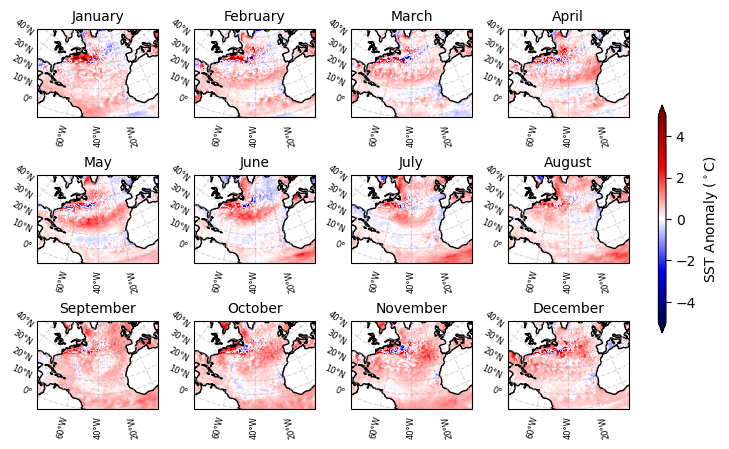

In [7]:
# Test whether the (as of 6/10/2024, dubious) post stamp-style plotting function in heatwave.py works
fig, axes = htwv.monthly_plt(ssts_anom.sel(time=slice("2021-01-01", "2021-12-31")))

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3089359/866783713.py:8: SyntaxWarning: invalid escape sequence '\c'
  cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)')


Text(0.5, 1.0, '2020-01 SSTs and Wind Anomalies')

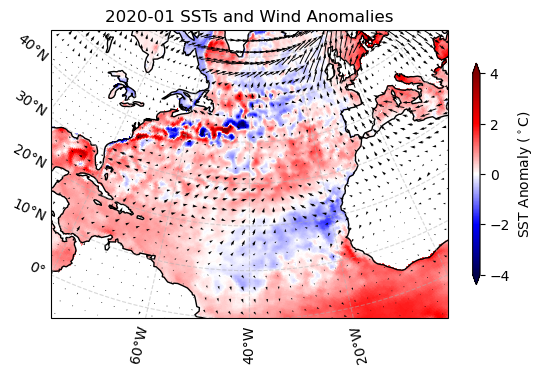

In [8]:
# Choose an aribtrary day (2020-01-01) to test plotting wind field and SST anomalies
central_lon = -40
central_lat = 30
wind_fig2, ax_wind2 = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})
temp, ax_wind2 = htwv.plt_temp(ssts_anom.sel(time="2020-01-01"), ax_wind2, vmin = -4, vmax = 4, cmap= "seismic", transform = ccrs.PlateCarree(), add_colorbar=False)
ax_wind2 = htwv.plt_wind(wind_anom.sel(time="2020-01-01"), ax_wind2, x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), add_guide=False)
cbar = fig.colorbar(temp, ax = ax_wind2, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)')
ax_wind2.set_title("2020-01 SSTs and Wind Anomalies")

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3089359/137991461.py:6: SyntaxWarning: invalid escape sequence '\c'
  cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)')


Text(0.5, 1.0, '2020-01 SSTs and Total Wind Field')

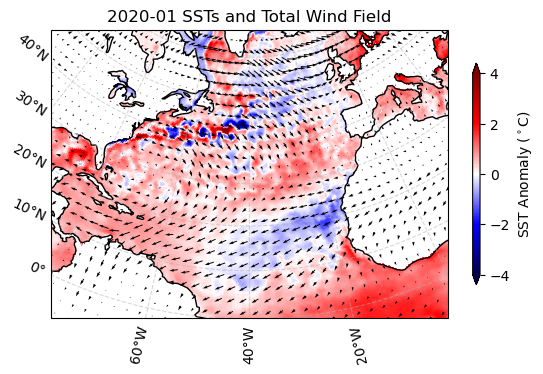

In [9]:
# Using the same arbitrary day as the previous cell, test plotting total wind field and SST anomalies
wind_fig2, ax_wind2 = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})
temp, ax_wind2 = htwv.plt_temp(ssts_anom.sel(time="2020-01-01"), ax_wind2, vmin = -4, vmax = 4, cmap= "seismic", transform = ccrs.PlateCarree(), add_colorbar=False)
ax_wind2 = htwv.plt_wind(wind.sel(time="2020-01-01").coarsen(lat=10, lon=10, boundary="trim").mean(), ax_wind2, x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), add_guide=False)
cbar = fig.colorbar(temp, ax = ax_wind2, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)')
ax_wind2.set_title("2020-01 SSTs and Total Wind Field")

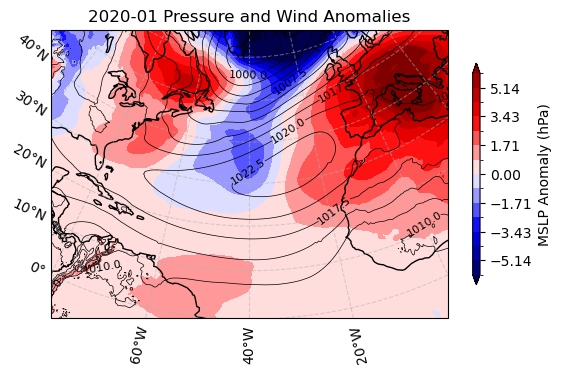

In [10]:
# Calculate long term monthly MSLP using 1991-2020 climatology
ltm_slp = mslp.sel(time=slice("1991-01-01", "2020-12-31")).groupby("time.month").mean(dim="time")
# Convert Pa to hPa
ltm_hpa = ltm_slp

# Plot MSLP anomaly and long term mean contours for Jan 2020
mslp_fig, ax_mslp = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})
central_lon = -40
central_lat = 30
ax_mslp.coastlines()
ax_mslp.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
ax_mslp.set_extent([-80, 0, 0, 60])
gl = ax_mslp.gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
gl.right_labels = False
gl.top_labels = False
mslp_plot = ltm_hpa.isel(month=1).msl.plot.contour(ax=ax_mslp, levels=15, transform = ccrs.PlateCarree(), colors="k", linewidths =0.5 )
ax_mslp.clabel(mslp_plot, inline=True, fontsize=8)
pressure, ax_mslp = htwv.plt_pressure(mslp_anom.msl.sel(time="2020-01-01"), ax_mslp,vmin=-6, vmax=6, transform = ccrs.PlateCarree(), levels=15,extend="both", cmap = "seismic", add_colorbar=False)
#ax_mslp = htwv.plt_wind(wind_anom.sel(time="2020-01-01"), ax_mslp, x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), add_guide=False)

cbar = fig.colorbar(pressure, ax = ax_mslp, orientation="vertical", aspect=30, shrink=0.6)
cbar.ax.set_ylabel('MSLP Anomaly (hPa)')
ax_mslp.set_title("2020-01 Pressure and Wind Anomalies")
plt.savefig("figures/2020-01_pres&conts.png", dpi=300)

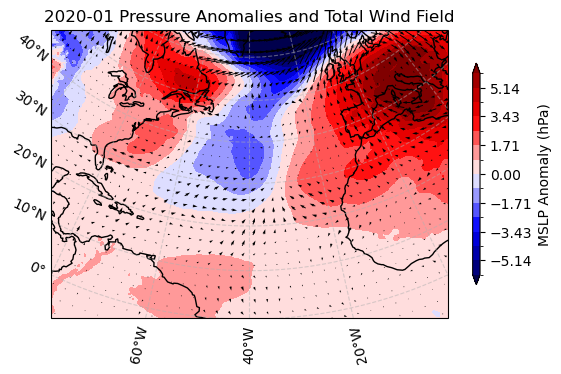

In [11]:
# Plot MSLP anomaly and total mean wind field for Jan 2020
mslp_fig, ax_mslp = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})
pressure, ax_mslp = htwv.plt_pressure(mslp_anom.msl.sel(time="2020-01-01"), ax_mslp, transform = ccrs.PlateCarree(), levels=15, vmin=-6, vmax = 6, extend="both", cmap = "seismic", add_colorbar=False)
ax_mslp = htwv.plt_wind(wind_anom.sel(time="2020-01-01"), ax_mslp, x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), add_guide=False)
cbar = fig.colorbar(pressure, ax = ax_mslp, orientation="vertical", aspect=30, shrink=0.6)
cbar.ax.set_ylabel('MSLP Anomaly (hPa)')
ax_mslp.set_title("2020-01 Pressure Anomalies and Total Wind Field")
plt.savefig("figures/2020-01_wind&pres.png", dpi=300)

## GIFs and Post Stamps

<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3089359/932911618.py:21: SyntaxWarning: invalid escape sequence '\c'
  cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)')


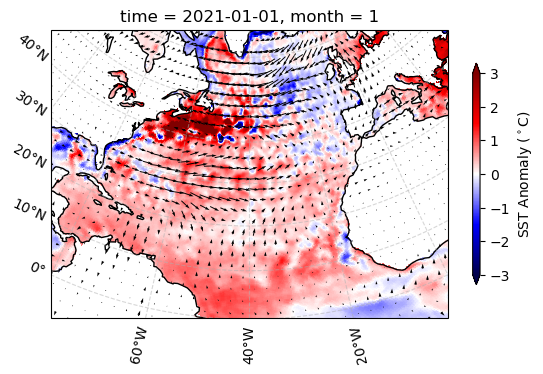

In [12]:
# Create GIF of 2021 monthly SST anomalies with wind anomalies overlaid
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})

sst_anom_2021 = ssts_anom.sel(time=slice("2021-01-01", "2021-12-31"))
wind_anom_2021 = wind_anom.sel(time=slice("2021-01-01", "2021-12-31"))


central_lon = -40
central_lat = 30
ax.coastlines()
ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
ax.set_extent([-80, 0, 0, 60])
# Need to plot the data once outside of the animate function and grab the colorbar; otherwise you'll
# get recursive colorbars.
gl = ax.gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
gl.right_labels = False
gl.top_labels = False
temp = sst_anom_2021.isel(time=0).plot(ax=ax, vmin = -3, vmax = 3, cmap= "seismic", transform = ccrs.PlateCarree(), add_colorbar=False)
wind_anom_2021.isel(time=0).plot.quiver(ax=ax, x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), add_guide=False)
cbar = plt.colorbar(temp, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)')

# Function to be used with matplotlib FuncAnimation
def animate(i):
    ax.clear()
    central_lon = -40
    central_lat = 30
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
    ax.set_extent([-80, 0, 0, 60])
    gl = ax.gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
    gl.right_labels = False
    gl.top_labels = False
    sst_anom_2021.isel(time=i).plot(ax=ax, vmin = -3, vmax = 3, cmap= "seismic", transform = ccrs.PlateCarree(), add_colorbar=False)
    wind_anom_2021.isel(time=i).plot.quiver(ax=ax, x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), add_guide=False)
    
anim = animation.FuncAnimation(fig, animate, frames=12, interval=900, blit=False)
anim.save(filename="figures/ssts_wind_anom.gif", writer="pillow")

<>:46: SyntaxWarning: invalid escape sequence '\c'
<>:46: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3089359/902561213.py:46: SyntaxWarning: invalid escape sequence '\c'
  cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)', fontsize=10)


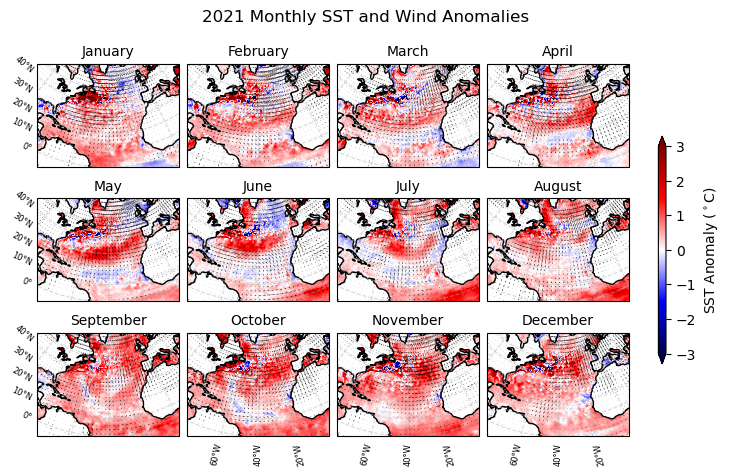

In [13]:
# Create post stamp style plot of 2021 monthly SST anomalies with wind field anomalies overlaid
sst_anom_2021 = ssts_anom.sel(time=slice("2021-01-01", "2021-12-31"))
wind_anom_2021 = wind_anom.sel(time=slice("2021-01-01", "2021-12-31"))
wind_2021 = wind.sel(time=slice("2021-01-01", "2021-12-31")).coarsen(lat=10, lon=10, boundary="trim").mean()
sst_anom_2021 = sst_anom_2021.groupby("time.month").mean(dim="time")
wind_anom_2021 = wind_anom_2021.groupby("time.month").mean(dim="time")

central_lon = -40
central_lat = 30
coloring = plt.get_cmap("seismic")
months = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}


fig, axs = plt.subplots(3, 4, figsize=(7.2, 5), layout = 'compressed', subplot_kw={"projection":ccrs.LambertConformal(central_lon, central_lat)})
axs = axs.flatten()

for i,month in enumerate(range(1,13)):
    anom_month_sst = sst_anom_2021.sel(month=month)
    anom_month_wind = wind_anom_2021.sel(month=month) 
    anom_month_sst["month"] = months[i+1]
    anom_month_wind["month"] = months[i+1]
    axs[i].coastlines()
    axs[i].add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
    axs[i].set_extent([-80, 0, 0, 60])
    # This if statement will only plot grid labels on the outer left and bottom of the overall plot
    if i == 0 or i == 4 or i == 8:
        gl = axs[i].gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        gl.bottom_labels = False
        gl.ylabel_style = {"size":6}
    elif i >= 8:
        gl_bot = axs[i].gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
        gl_bot.right_labels = False
        gl_bot.top_labels = False
        gl_bot.left_labels = False
        gl_bot.xlabel_style = {"size":6}
    else: 
        gl = axs[i].gridlines(alpha = 0.5, draw_labels=False, linestyle = "--", x_inline=False, y_inline=False)
    # Plot fields
    anom_plot = anom_month_sst.plot(ax=axs[i], cmap=coloring, transform=ccrs.PlateCarree(), vmin=-3, vmax=3, add_colorbar=False)
    anom_month_wind.plot.quiver(ax=axs[i], x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), add_guide=False)
    axs[i].set_title(anom_month_wind["month"].values, fontsize=10)

cbar = plt.colorbar(anom_plot, ax=axs, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)', fontsize=10)    
plt.suptitle("2021 Monthly SST and Wind Anomalies")
plt.savefig("figures/2021_post_stamp_wind&ssts.png", dpi=300)

<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3089359/3975164355.py:22: SyntaxWarning: invalid escape sequence '\c'
  cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)')


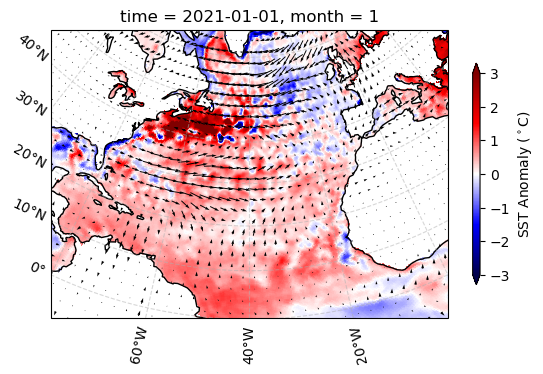

In [14]:
# Create GIF of 2021 monthly SST anomalies with total wind field overlaid
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})

sst_anom_2021 = ssts_anom.sel(time=slice("2021-01-01", "2021-12-31"))
wind_anom_2021 = wind_anom.sel(time=slice("2021-01-01", "2021-12-31"))
wind_2021 = wind.sel(time=slice("2021-01-01", "2021-12-31")).coarsen(lat=10, lon=10, boundary="trim").mean()


central_lon = -40
central_lat = 30
ax.coastlines()
ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
ax.set_extent([-80, 0, 0, 60])
# Need to plot the data once outside of the animate function and grab the colorbar; otherwise you'll
# get recursive colorbars.
gl = ax.gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
gl.right_labels = False
gl.top_labels = False
temp = sst_anom_2021.isel(time=0).plot(ax=ax, vmin = -3, vmax = 3, cmap= "seismic", transform = ccrs.PlateCarree(), add_colorbar=False)
wind_2021.isel(time=0).plot.quiver(ax=ax, x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), add_guide=False)
cbar = plt.colorbar(temp, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)')

# Function to be used with matplotlib FuncAnimation
def animate(i):
    ax.clear()
    central_lon = -40
    central_lat = 30
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
    ax.set_extent([-80, 0, 0, 60])
    gl = ax.gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
    gl.right_labels = False
    gl.top_labels = False
    sst_anom_2021.isel(time=i).plot(ax=ax, vmin = -3, vmax = 3, cmap= "seismic", transform = ccrs.PlateCarree(), add_colorbar=False)
    wind_anom_2021.isel(time=i).plot.quiver(ax=ax, x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), add_guide=False)
    
anim = animation.FuncAnimation(fig, animate, frames=12, interval=900, blit=False)
anim.save(filename="figures/ssts_total_wind_2021.gif", writer="pillow")

<>:47: SyntaxWarning: invalid escape sequence '\c'
<>:47: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3089359/2803628912.py:47: SyntaxWarning: invalid escape sequence '\c'
  cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)', fontsize=10)


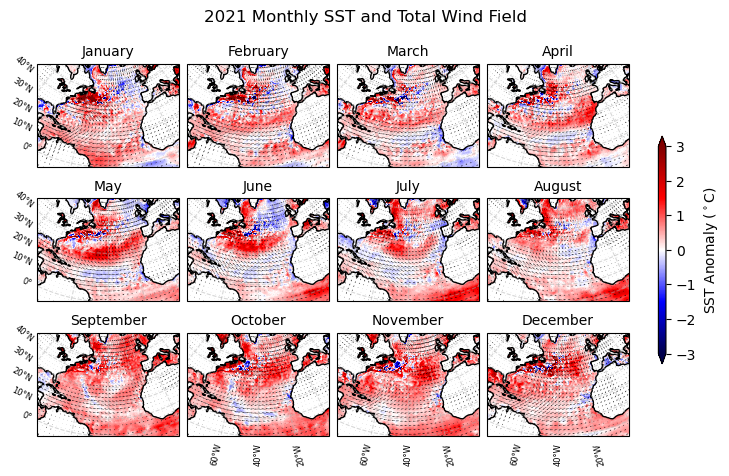

In [15]:
# Create post stamp style plot of 2021 monthly SST anomalies with total wind field overlaid
sst_anom_2021 = ssts_anom.sel(time=slice("2021-01-01", "2021-12-31"))
wind_anom_2021 = wind_anom.sel(time=slice("2021-01-01", "2021-12-31"))
wind_2021 = wind.sel(time=slice("2021-01-01", "2021-12-31")).coarsen(lat=10, lon=10, boundary="trim").mean()
sst_anom_2021 = sst_anom_2021.groupby("time.month").mean(dim="time")
wind_anom_2021 = wind_anom_2021.groupby("time.month").mean(dim="time")
wind_2021 = wind_2021.groupby("time.month").mean(dim="time")

central_lon = -40
central_lat = 30
coloring = plt.get_cmap("seismic")
months = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}


fig, axs = plt.subplots(3, 4, figsize=(7.2, 5), layout = 'compressed', subplot_kw={"projection":ccrs.LambertConformal(central_lon, central_lat)})
axs = axs.flatten()

for i,month in enumerate(range(1,13)):
    anom_month_sst = sst_anom_2021.sel(month=month)
    month_wind = wind_2021.sel(month=month) 
    anom_month_sst["month"] = months[i+1]
    month_wind["month"] = months[i+1]
    axs[i].coastlines()
    axs[i].add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
    axs[i].set_extent([-80, 0, 0, 60])
    # This if statement will only plot grid labels on the outer left and bottom of the overall plot
    if i == 0 or i == 4 or i == 8:
        gl = axs[i].gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        gl.bottom_labels = False
        gl.ylabel_style = {"size":6}
    elif i >= 8:
        gl_bot = axs[i].gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
        gl_bot.right_labels = False
        gl_bot.top_labels = False
        gl_bot.left_labels = False
        gl_bot.xlabel_style = {"size":6}
    else: 
        gl = axs[i].gridlines(alpha = 0.5, draw_labels=False, linestyle = "--", x_inline=False, y_inline=False)
    # Plot fields
    anom_plot = anom_month_sst.plot(ax=axs[i], cmap=coloring, transform=ccrs.PlateCarree(), vmin=-3, vmax=3, add_colorbar=False)
    month_wind.plot.quiver(ax=axs[i], x="lon", y="lat", u="u10", v="v10", transform=ccrs.PlateCarree(), add_guide=False)
    axs[i].set_title(month_wind["month"].values, fontsize=10)

cbar = plt.colorbar(anom_plot, ax=axs, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)', fontsize=10)    
plt.suptitle("2021 Monthly SST and Total Wind Field")
plt.savefig("figures/2021_post_stamp_totalwind&ssts.png", dpi=300)

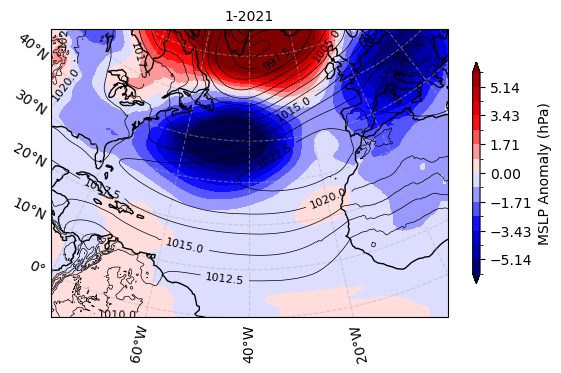

In [16]:
# Create GIF of 2021 monthly MSLP anomalies with long term mean contours overlaid
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})

mslp_anom_2021 = mslp_anom.msl.sel(time=slice("2021-01-01", "2021-12-31"))
mslp_ltm_2021 = mslp.msl.sel(time=slice("1991-01-01", "2020-12-31")).groupby("time.month").mean(dim="time")

central_lon = -40
central_lat = 30
ax.coastlines()
ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
ax.set_extent([-80, 0, 0, 60])
# Need to plot the data once outside of the animate function and grab the colorbar; otherwise you'll
# get recursive colorbars.
gl = ax.gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
gl.right_labels = False
gl.top_labels = False
mslp_plot = mslp_anom_2021.isel(time=0).plot.contourf(ax=ax, vmin=-6, vmax=6, transform = ccrs.PlateCarree(), levels=15,extend="both", cmap = "seismic", add_colorbar=False)
cbar = plt.colorbar(mslp_plot, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel('MSLP Anomaly (hPa)')

# Function to be used with matplotlib FuncAnimation
def animate(i):
    ax.clear()
    central_lon = -40
    central_lat = 30
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
    ax.set_extent([-80, 0, 0, 60])
    gl = ax.gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
    gl.right_labels = False
    gl.top_labels = False
    mslp_anom_2021.isel(time=i).plot.contourf(ax=ax, vmin=-8, vmax=8, transform = ccrs.PlateCarree(), levels=15,extend="both", cmap = "seismic", add_colorbar=False)
    mslp_plot = mslp_ltm_2021.isel(month=i).plot.contour(ax=ax, levels=15, transform = ccrs.PlateCarree(), colors="k", linewidths =0.5 )
    ax.clabel(mslp_plot, inline=True, fontsize=8)
    ax.set_title(str(i+1) + "-2021", fontsize=10)
    
anim = animation.FuncAnimation(fig, animate, frames=12, interval=900, blit=False)
anim.save(filename="figures/2021_pressures_contours.gif", writer="pillow")

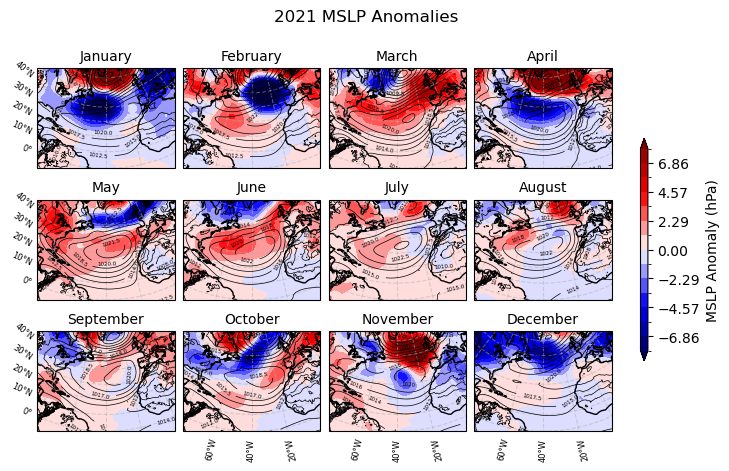

In [17]:
# Create post stamp style plot of 2021 monthly MSLP anomalies with long term mean contours overlaid
mslp_anom_2021 = mslp_anom.msl.sel(time=slice("2021-01-01", "2021-12-31")).groupby("time.month").mean(dim="time")
mslp_ltm_2021 = mslp.msl.sel(time=slice("1991-01-01", "2020-12-31")).groupby("time.month").mean(dim="time")

central_lon = -40
central_lat = 30
coloring = plt.get_cmap("seismic")
months = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}


fig, axs = plt.subplots(3, 4, figsize=(7.2, 5), layout = 'compressed', subplot_kw={"projection":ccrs.LambertConformal(central_lon, central_lat)})
axs = axs.flatten()

for i,month in enumerate(range(1,13)):
    anom_month = mslp_anom_2021.sel(month=month)
    ltm_month = mslp_ltm_2021.sel(month=month)
    anom_month["month"] = months[i+1]
    ltm_month["month"] = months[i+1]
    axs[i].coastlines()
    axs[i].add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
    axs[i].set_extent([-80, 0, 0, 60])
    # This if statement will only plot grid labels on the outer left and bottom of the overall plot
    if i == 0 or i == 4 or i == 8:
        gl = axs[i].gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        gl.bottom_labels = False
        gl.ylabel_style = {"size":6}
    elif i >= 8:
        gl_bot = axs[i].gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
        gl_bot.right_labels = False
        gl_bot.top_labels = False
        gl_bot.left_labels = False
        gl_bot.xlabel_style = {"size":6}
    else:
        gl = axs[i].gridlines(alpha = 0.5, draw_labels=False, linestyle = "--", x_inline=False, y_inline=False)

    # Plot fields
    anom_plot = anom_month.plot.contourf(ax=axs[i], vmin=-8, vmax=8, transform = ccrs.PlateCarree(), levels=15,extend="both", cmap = "seismic", add_colorbar=False)
    mslp_plot = ltm_month.plot.contour(ax=axs[i], levels=15, transform = ccrs.PlateCarree(), colors="k", linewidths =0.5 )
    axs[i].clabel(mslp_plot, inline=True, fontsize=4)
    axs[i].set_title(anom_month["month"].values, fontsize=10)

cbar = plt.colorbar(anom_plot, ax=axs, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel('MSLP Anomaly (hPa)', fontsize=10)    
plt.suptitle("2021 MSLP Anomalies")
plt.savefig("figures/2021_post_stamp_mslp.png", dpi=300)